# Determining information derived from the population of 'Japan'
### By Lawrence T Quesada

## The Data: The Japanese Population  Dataset

This is a Kaggle Dataset contributed by Joshua Deresnski on June 1, 2018. The dataset contains the population information for the different prefecture area of Japan with records dating back to 1870, around the time when recordkeeping begun.

For historical information, The modernization of Japan begun during the Meiji era from Jan 25, 1868 until Jul 30, 1912. It was during this era that record keeping begun.

With the declining in population of this asian economic giant, the dataset gives insight not just on the general population of the country. The Dataset is also broken down into the different prefectural regions. The data should give insight on whether the population begun its decline pre-world war II, post World War II and even duing the mordernization era of Japan, also known as the Meiji Era.

The Dataset can be found at this url: https://www.kaggle.com/jd1325/japan-population-data

## Research Design

This research will help identify population metrics throughout the country in order to make policy decisions that could benefit their citizens and residences.

#### The Hypothesis 

H0 - The Population has been in consistent increase since 1945.

H1 - There is a significan difference in the population since 1945.


#### In order to test the Hypothesis, we will be following these steps.

- Initially we will perform an EDA (explaratory data analysis) to see what the current data tells us.
- Plots will be made using matplotlib, seaborn to give us a visual representation of the current dataset.
- We then need to separate the dates into post 1945 and pre 1945. 1945 as the end of world war II.
- We will also group the prefectural regions and dates to separate them. This will give us an idea wheather the population has been on a nationwide scale or how different it is from one region to another.
- We will get the T-Test in order to find out if there is a significant differences in population using .05 as the baseline value.
- A map using pandas geoplot will be presented as a form of visual representation to see if the significant decrease in population is happening in certain regions or that of the entire country.

## Audience

This research shall benefit Economists, Policy Makers, sociologists and students alike.

With reports of the general decline in Japan's population, the study gives more detailed information when making decisions. Not all policy decisions created can be created for all prefectural regions where some metropolitan areas such as Tokyo and Osaka may not have significant decrease in population. 

Economic reccomendations can also be provided depending on the prefectures' population. Will more development be needed with an increase on population in certain areas to serve a growing demand? or do we need to move development in an area with decreasing population in order to revitalize and support their local economies.

The population count can also give rise to the study on whether its' cultural norms, and if the change in this could have affected their decrease or increase in population. Target areas can be specific to their line of research.

# Exploratory Data Analysis (EDA)

### Importing the Libraries, viewing properties and head of dataset.

First, we will import the neccessary Python libraries needed in order to analyze the data, including libraries that will help up create charts telling us the story of the Data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.api as sms
from statsmodels import stats as st
import math

We then begin reading the dataset as a pandas DataFrame and assigning it to a variable 'japan_pop'.

In [2]:
japan_pop = pd.read_csv('Japan_population_data.csv')

Our first analysis will be retrieving basic information on the Dataset and viewing the head of the DataFrame to give us what the data would look like.

In [3]:
japan_pop.info()
japan_pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prefecture      2632 non-null   object 
 1   year            2632 non-null   float64
 2   population      2540 non-null   float64
 3   capital         2632 non-null   object 
 4   region          2632 non-null   object 
 5   estimated_area  2632 non-null   float64
 6   island          2632 non-null   object 
dtypes: float64(3), object(4)
memory usage: 144.1+ KB


,prefecture,year,population,capital,region,estimated_area,island
0,Aichi-ken,1872.1667,1210368.0,Nagoya-shi,Chubu,5165.12,Honshu
1,Aichi-ken,1873.0000,1217444.0,Nagoya-shi,Chubu,5165.12,Honshu
2,Aichi-ken,1874.0000,1217521.0,Nagoya-shi,Chubu,5165.12,Honshu
3,Aichi-ken,1875.0000,1234003.0,Nagoya-shi,Chubu,5165.12,Honshu
4,Aichi-ken,1876.0000,1244711.0,Nagoya-shi,Chubu,5165.12,Honshu


### Missing Values

As we count for any missing values, we see that the populations has a raround 92 missing values. This may have led in different factores such as data collection accuracy and events that occured during some time periods.

In [4]:
#Getting the total count / sum of any missing values
japan_pop.isna().sum()

prefecture         0
year               0
population        92
capital            0
region             0
estimated_area     0
island             0
dtype: int64

In [5]:
#Dropping the mising values
japan_pop.dropna(inplace=True)

In [6]:
#veryfying that the missing values has been dropped
japan_pop.isna().sum()

prefecture        0
year              0
population        0
capital           0
region            0
estimated_area    0
island            0
dtype: int64

### Changing the data type of  the 'year' column

The column 'year' is formatted incorrectly as there are 4 digits pass the decimal point. We will format the dates properly by changing the datatype from a float into an integer. This will eliminate the unnecessary digits after the years' decimal place.

In [7]:
japan_pop['year'] = japan_pop['year'].astype(int)
japan_pop.info()
japan_pop.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prefecture      2540 non-null   object 
 1   year            2540 non-null   int32  
 2   population      2540 non-null   float64
 3   capital         2540 non-null   object 
 4   region          2540 non-null   object 
 5   estimated_area  2540 non-null   float64
 6   island          2540 non-null   object 
dtypes: float64(2), int32(1), object(4)
memory usage: 148.8+ KB


,prefecture,year,population,capital,region,estimated_area,island
0,Aichi-ken,1872,1210368.0,Nagoya-shi,Chubu,5165.12,Honshu
1,Aichi-ken,1873,1217444.0,Nagoya-shi,Chubu,5165.12,Honshu
2,Aichi-ken,1874,1217521.0,Nagoya-shi,Chubu,5165.12,Honshu
3,Aichi-ken,1875,1234003.0,Nagoya-shi,Chubu,5165.12,Honshu
4,Aichi-ken,1876,1244711.0,Nagoya-shi,Chubu,5165.12,Honshu


### Indentifying the number of Prefectural provinces.

Looking at how many 'Prefectures' in order to conduct the analysis on each of them

In [8]:
#Getting a Description of how many prefectural regions are there in Japan.
japan_pop['prefecture'].describe()

count              2540
unique               47
top       Fukushima-ken
freq                 56
Name: prefecture, dtype: object

In [9]:
#Getting the names of each prefecture in Japan.
japan_pop['prefecture'].unique()

array(['Aichi-ken', 'Akita-ken', 'Aomori-ken', 'Chiba-ken', 'Ehime-ken',
       'Fukui-ken', 'Fukuoka-ken', 'Fukushima-ken', 'Gifu-ken',
       'Gunma-ken', 'Hiroshima-ken', 'Hokkaido', 'Hyogo-ken',
       'Ibaraki-ken', 'Ishikawa-ken', 'Iwate-ken', 'Kagawa-ken',
       'Kagoshima-ken', 'Kanagawa-ken', 'Kochi-ken', 'Kumamoto-ken',
       'Kyoto-fu', 'Mie-ken', 'Miyagi-ken', 'Miyazaki-ken', 'Nagano-ken',
       'Nagasaki-ken', 'Nara-ken', 'Niigata-ken', 'Oita-ken',
       'Okayama-ken', 'Okinawa-ken', 'Osaka-fu', 'Saga-ken',
       'Saitama-ken', 'Shiga-ken', 'Shimane-ken', 'Shizuoka-ken',
       'Tochigi-ken', 'Tokushima-ken', 'Tokyo-to', 'Tottori-ken',
       'Toyama-ken', 'Wakayama-ken', 'Yamagata-ken', 'Yamaguchi-ken',
       'Yamanashi-ken'], dtype=object)

### Limiting to using 'regions' instead of prefecures.

There are a lot or prefectures which may not fit the scale in plots that will be created. More specifically, there are '47' Prefectures in Japan. Additionally, each 'prefecture' may have different socio-economic factors and ways of gathering data. Getting into the more details analysis of 'prefectures will require more substantial time and research.

In order to change the scale, we will be using the regions of 'Japan' which is only composed of 8 regions. This will give us a larger picture of their population.

In [10]:
#Couting the unique regions
print(japan_pop['region'].unique())
print(japan_pop['region'].describe())

['Chubu' 'Tohoku' 'Kanto' 'Shikoku' 'Kyushu' 'Chugoku' 'Hokkaido' 'Kansai']
count      2540
unique        8
top       Chubu
freq        482
Name: region, dtype: object


### Creating the Plots

In [11]:
#Setting the scale of the plot for easier and larger viewing.
sns.set(rc={'figure.figsize':[16, 10]})

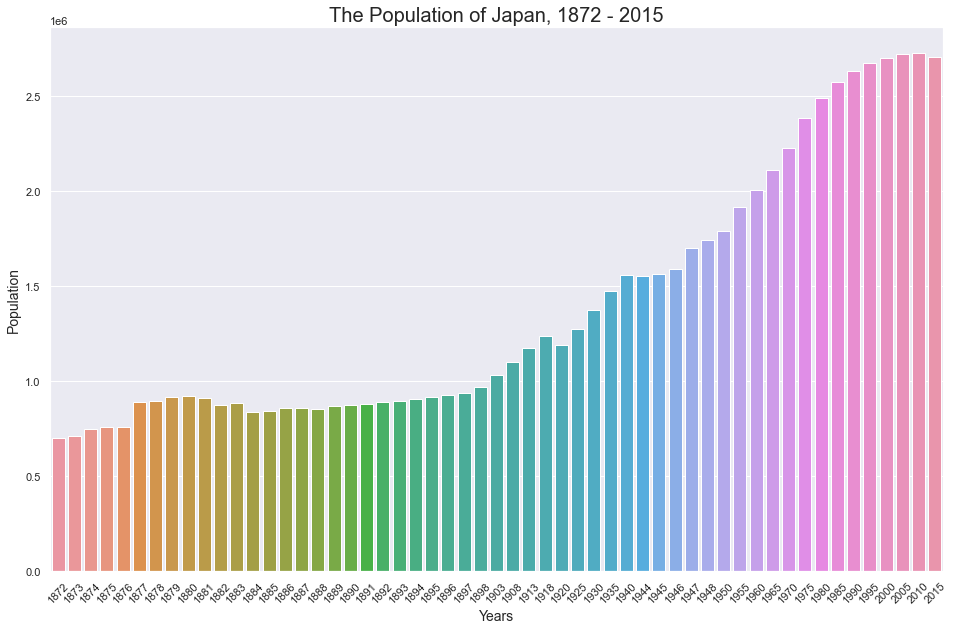

In [12]:
#Creating a barplot with the data.
ax = sns.barplot(data= japan_pop, x='year', y='population', ci=None)
plt.title('The Population of Japan, 1872 - 2015', fontsize=20)
plt.xlabel('Years', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Population', fontsize=14)
plt.show()

### Insights from the first 'barplot'.

#### The Following Insights can be derived from the plot above

* The Population has been increasing steadily with no significant change since record keeping begun.
* Before 1898, There were minor changes in the populations which are barely noticable.
* After 1898, a steady increase in population has begun without any significant changes.
* before and after 1945 also showed a consistent and healthy increase in population. 
* There are no suddent spikes in the population.
* Beginning 1947, we see a slight jump in population, however, the overal population does not show any critical change.

We need to take a closer look if this has been the same trend in the different regions of 'Japan'.


#### Alternative plot with a different viewpoint

Next, we will create another plot with a different perspective in which we will look closely at the population data in each region instead of the whole country.

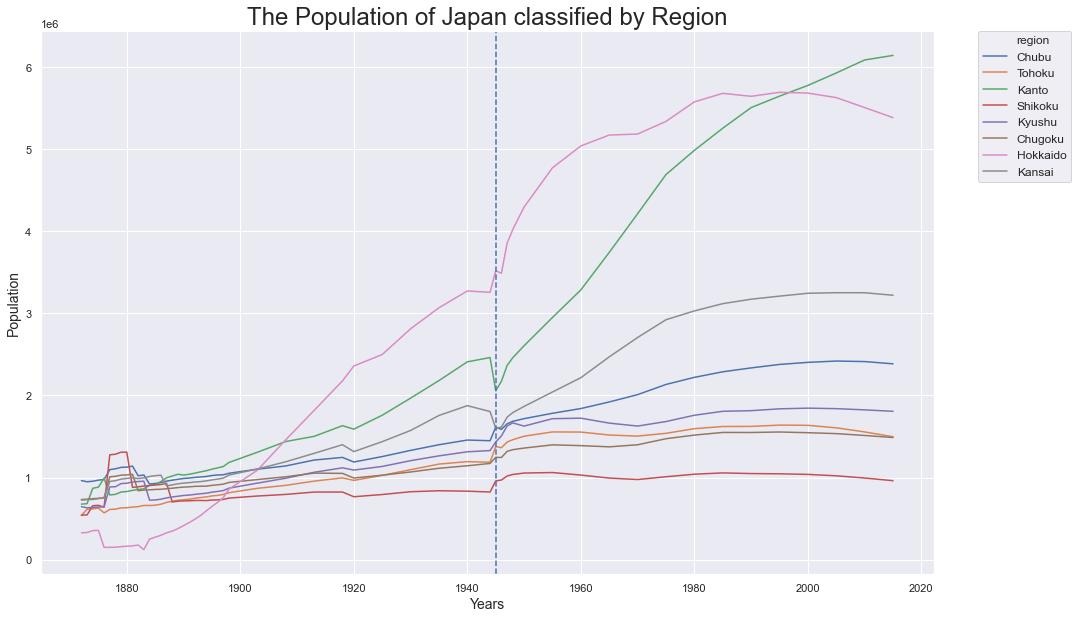

In [13]:
sns.lineplot(x="year", y="population",
             hue="region",
             data=japan_pop, ci=None)
plt.title('The Population of Japan classified by Region', fontsize=24)
plt.axvline(1945,0,max(japan_pop.population), linestyle='--')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

### Insights form the lineplot

The following insights can be derived from the line plot. The lineplot above looked more closely at the different regions in Japan. The following are insghits that can be derived

__A line was created in 1945 to observe the differences before and after.__

#### Pre and Post 1945
* When data collection begun, we see an evenly distributed population accross Japan.
* 1945 was selected as a good indicator when the second world war ended.
* There is a significant and __noticable dip and the population around 1945.__ This can also be attributed to the death tolls after dropping the atomic bomb in Hiroshima (150,000) and Nagasaki (75,000). (ref. http://www.aasc.ucla.edu/cab/200708230009.html)
* The years following 1945 also showed an increase in population, which can also be attributed to the baby boomer generation. With the war ended, people can safely start families

#### Top 3 regional insights
* The 'Kanto' region shows a very __sharp increase__ which is not seen in any other regions. This can be attributed to the countrys' largest metropolitan city 'Tokyo'. Individuals may have been moving in large masses to Tokyo seeking better economic conditions.
* The 'Hokkaido' region is located in the most Northern part of Japan which is known for its Dairy, Agriculture and Seafood. The conditions here makes it suitable for these activities. People may have seen better opportunities here after 1945 but begun to slide again when other opportunities found its way elsewhere.
* The 'Kansai' region in Western Japan is the location of its second largest metropolitan city, 'Osaka'.

#### Other Regional Insights
* Though an increase in population can be seen, its growth is __significanly smaller__ and is not consistent with any economic growth. The growth has only been attributed to 'Kanto' while almost __disregading other areas.__
* The __'Shikoku'__ region which once saw an increase in population around the 1880s not has the lowest population and is still __declining.__
* The 'Tohoku' region also sees a decline inpopulation, especially in recent years.

### Alternative Plots

An alternative plot will be created to validate our observations with the first plot. We will use a categorical plot and separate the periods before and after 1945.

### Creating Boxplots to view the distribution of data

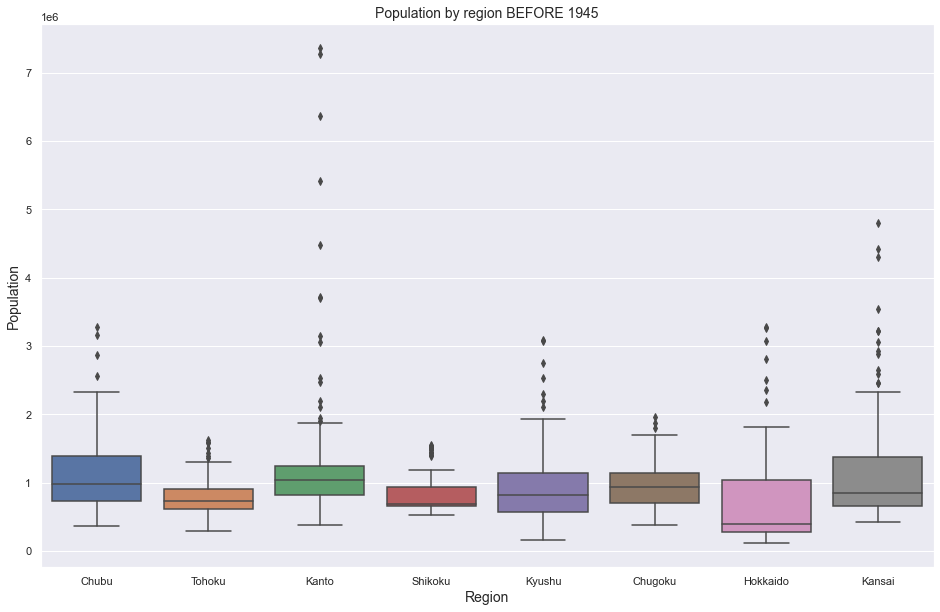

In [14]:
#Plotting the population before 1945
sns.boxplot(x='region', y='population', data=japan_pop.query('year < 1945'))
plt.title('Population by region BEFORE 1945', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.show()

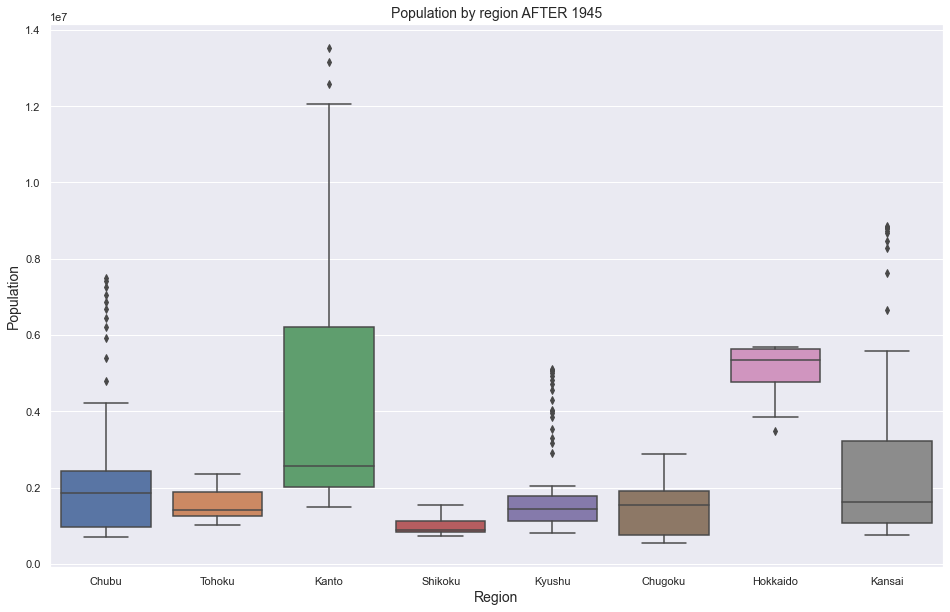

In [15]:
#Plotting the population after 1945
sns.boxplot(x='region', y='population', data=japan_pop.query('year > 1945'))
plt.title('Population by region AFTER 1945', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.show()

### Observations Derived from the Box Plot

The box plots also gives the same story of the data as with the previous lineplot. The following obeservations can be derived with the data.
* The __'Kanto' region has a significant increase__ in spread, similar to the lineplot with a jump in population. Again, this signifies the growth in population in the largest city, Tokyo.
* By viewing the different regions and comparing them, the __region of 'Kansai' and 'Shikoku' also sees a significant drop in population.__
* The __scale__ of the Y-axis is also different. This signifies a change in the population.

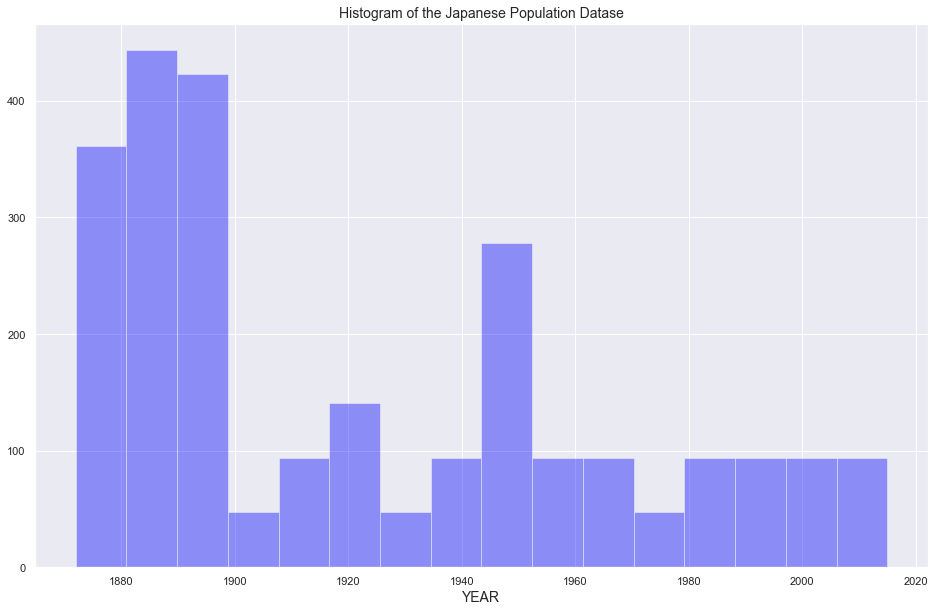

In [16]:
#Histogram 
sns.distplot(japan_pop.year, kde=False, color='blue')
plt.title('Histogram of the Japanese Population Datase', fontsize=14)
plt.xlabel('YEAR', fontsize=14)
plt.show()

### Observations Derived from the Distribution Plot

The following are the observations derived from the distribution plot above
* There was __extensive Data collection before the 20th century.__ This may have been because of extra census taken, new and unfamliar collection methods. Additionally, this can be also attributed to the eagerness to modernize the country with census collection as being part of that.
* Just before the years before the war, they have begun to familiarize themselves with Data collection methods which they plan to use to this day. The collection method may have occured every 5 years.
* There was a huge __spike in the 1950's__ which can be attributed to the events following the war. More data could have been needed or the occupying forces may have required more infromation.
* The 1960's has brought more consistency in data collection except around 1970. The __drop in data in 1970__ may be due to other factors which may need additional research.
* the method of data collection from __1980 until 2015 has remained consistent__ and is now the standard model of data collection accepted by the Japanese government.
* The Y-Axis denotes the counts.

### Experimental Design

In [17]:
#Separate the Dataset into 2, separating post and pre 1945 as point of comparison
japan_b1945 = japan_pop[japan_pop['year'] < 1945]
japan_a1945 = japan_pop[japan_pop['year'] > 1945]

#displaying information and the head of the datasets after separation.
display(japan_a1945.describe(), japan_a1945, japan_b1945.describe(), japan_b1945)

,year,population,estimated_area
count,796.000000,7.960000e+02,796.000000
mean,1976.345477,2.277505e+06,8063.320113
std,22.741865,2.062950e+06,11598.419569
min,1946.000000,5.574290e+05,1876.550000
25%,1955.000000,1.080301e+06,4146.740000
50%,1975.000000,1.568538e+06,6095.720000
75%,1995.000000,2.349375e+06,8396.160000
max,2015.000000,1.351373e+07,83457.000000


,prefecture,year,population,capital,region,estimated_area,island
39,Aichi-ken,1946,2919085.0,Nagoya-shi,Chubu,5165.12,Honshu
40,Aichi-ken,1947,3122902.0,Nagoya-shi,Chubu,5165.12,Honshu
41,Aichi-ken,1948,3226116.0,Nagoya-shi,Chubu,5165.12,Honshu
42,Aichi-ken,1950,3390585.0,Nagoya-shi,Chubu,5165.12,Honshu
43,Aichi-ken,1955,3769209.0,Nagoya-shi,Chubu,5165.12,Honshu
...,...,...,...,...,...,...,...
2627,Yamanashi-ken,1995,881996.0,Kofu-shi,Chubu,4465.37,Honshu
2628,Yamanashi-ken,2000,888172.0,Kofu-shi,Chubu,4465.37,Honshu
2629,Yamanashi-ken,2005,884515.0,Kofu-shi,Chubu,4465.37,Honshu
2630,Yamanashi-ken,2010,863075.0,Kofu-shi,Chubu,4465.37,Honshu


,year,population,estimated_area
count,1698.000000,1.698000e+03,1698.000000
mean,1896.060071,9.825347e+05,8239.656514
std,19.470327,5.659468e+05,11833.990813
min,1872.000000,1.227050e+05,1876.550000
25%,1882.000000,6.560305e+05,4185.670000
50%,1890.000000,8.578600e+05,6114.090000
75%,1903.000000,1.185359e+06,8396.160000
max,1944.000000,7.354971e+06,83457.000000


,prefecture,year,population,capital,region,estimated_area,island
0,Aichi-ken,1872,1210368.0,Nagoya-shi,Chubu,5165.12,Honshu
1,Aichi-ken,1873,1217444.0,Nagoya-shi,Chubu,5165.12,Honshu
2,Aichi-ken,1874,1217521.0,Nagoya-shi,Chubu,5165.12,Honshu
3,Aichi-ken,1875,1234003.0,Nagoya-shi,Chubu,5165.12,Honshu
4,Aichi-ken,1876,1244711.0,Nagoya-shi,Chubu,5165.12,Honshu
...,...,...,...,...,...,...,...
2609,Yamanashi-ken,1925,600675.0,Kofu-shi,Chubu,4465.37,Honshu
2610,Yamanashi-ken,1930,631042.0,Kofu-shi,Chubu,4465.37,Honshu
2611,Yamanashi-ken,1935,646727.0,Kofu-shi,Chubu,4465.37,Honshu
2612,Yamanashi-ken,1940,663026.0,Kofu-shi,Chubu,4465.37,Honshu


#### Kruskal-wallis Test

The Kurskal-Wallis test will be performed as there are 2 datasets available for comparisson. With the Kurskal-wallis Test, no additional step for normality will be needed.

In [18]:
#running the kruskal-wallis test on the years, before and after 1945
stats.kruskal(japan_b1945.year, japan_a1945.year)

KruskalResult(statistic=1625.7800820475063, pvalue=0.0)

With our initial test and Pvalue of zero, we can __reject__ the null hypothesis.

#### Kruskal-wallis test per region

Now let's see if the population was growing in each individual region.

In [19]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return(ci_lower, ci_upper)

In [20]:
regions = japan_pop.region.unique()

for region in regions:
    b1945 = japan_b1945[japan_b1945['region'] == region]
    a1945 = japan_a1945[japan_a1945['region'] == region]
    print(f'Region: {region}  Result:{stats.kruskal(b1945.population, a1945.population)}')
    
    #addding confidence interval of the population 95% BEFORE 1945
    cil, ciu = get_95_ci(b1945.population, a1945.population)
      
    print(f'The confidence Level of {region} is: {cil, ciu}')
    print(f'*' * 10)
    print('')

Region: Chubu  Result:KruskalResult(statistic=72.7083664267393, pvalue=1.5029559975167038e-17)
The confidence Level of Chubu is: (738480.5498816496, 1235087.15767554)
**********

Region: Tohoku  Result:KruskalResult(statistic=187.2917247356886, pvalue=1.2402545840174565e-42)
The confidence Level of Tohoku is: (688315.9434299503, 843482.1231335175)
**********

Region: Kanto  Result:KruskalResult(statistic=208.07875714318675, pvalue=3.606081287927546e-47)
The confidence Level of Kanto is: (2558711.8569263597, 3756211.411498252)
**********

Region: Shikoku  Result:KruskalResult(statistic=41.2104125114613, pvalue=1.3669242403449808e-10)
The confidence Level of Shikoku is: (129555.90833082607, 290873.61181739066)
**********

Region: Kyushu  Result:KruskalResult(statistic=125.2650158888517, pvalue=4.4531998179258323e-29)
The confidence Level of Kyushu is: (654696.1398467197, 1027499.9108786854)
**********

Region: Chugoku  Result:KruskalResult(statistic=27.525686998046467, pvalue=1.550218801

#### The following are the findings after running a Kruskal-Wallis Test, getting the confidence interval in each region and plotting it.
* The pvalue is close to 0 or less than 5%. With a pvalue of less than 5% we are confident in the difference of the population before and after 1945.
* We are 95% cofident that the sample mean falls between the upper and lower intervals.

### Conclusion

A the beginning of this experiment, we first looked at the data as a whole which presented a healthy increase in population. This was not the case when looking into in by region and more in detail. 

Because there are 47 prefectures, we decided to look into the 8 regions more and compared their population to before and after 1945.

1945 was used as basis to compare as 1945 was the end of the second world war..

With a P-value which is less than 5%, we are confident in the difference in post-war and pre-war Japan. It is therefore safe to __reject__ the null Hypothesis.

All confidence is positive which is also agood indication in choosing to reject the NULL.

Even if data looked flat, they still had positive confidence interval.

### Considerations and Plans for Additional Research

* Given time, we can look into insights further by looking at 20 years before and after 1945. This can give a more specific timeframe in which other factors can also be investigated.
* Additionally looking into a 10 year before and after 2005 can also give us a current interpretation on the status currently. This can also provide any indication on what kind of policies and decisions can be made.
* We can also look more in depth by analysis of each of the 47 regional administrative prefectures of Japan. This requires more analysis.
* We can do a time series analyis to show how the population has changed over the years.
* Instead of looking at just the overall population, we plan to look at birthrates, population growth, mortality and how has the population grown.
* The measurements are dependent of one another. More analysis and data is needed to find independent measurments.